In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import warnings
import numpy as np

import argparse

mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

In [4]:
dataset_name = 'flowers102_30'
#input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv_2/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0, on_bad_lines='skip')

qs_names = dataframe['qs'].unique()
print(qs_names.__class__)

<class 'numpy.ndarray'>


In [5]:
query_strategy_names = dataframe['qs'].unique()
print(query_strategy_names)

['RandomSampling' 'UncertaintySampling' 'DiscriminativeAL' 'CoreSet'
 'TypiClust' 'Badge']


In [6]:
result_score = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['score'].agg(['mean', 'std']).set_axis(['s_mean', 's_std'], axis=1)
result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(['t_mean', 't_std'], axis=1)
typiclust = result_time.loc['TypiClust']
print(result_time)

                                                t_mean     t_std
qs                  batch_size n_cycles step                    
Badge               16         30       0     0.056196  0.007467
                                        1     0.222299  0.020288
                                        2     0.382549  0.073409
                                        3     0.436235  0.075294
                                        4     0.476808  0.053090
...                                                ...       ...
UncertaintySampling 16         30       25    1.954986  0.426187
                                        26    2.061962  0.317456
                                        27    2.188483  0.327003
                                        28    1.969406  0.304720
                                        29    2.239949  0.470211

[180 rows x 2 columns]


In [7]:
# input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv_2/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0, on_bad_lines='skip')
dataframe = dataframe.dropna()

query_strategy_names = dataframe['qs'].unique()

result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(
    ['t_mean', 't_std'], axis=1)
b = result_time.loc['Badge']
qs_result_t_mean = b['t_mean'].to_numpy()
print(qs_result_t_mean)

[0.05619559 0.22229896 0.38254871 0.43623505 0.47680826 0.60344534
 0.85210657 0.98194151 1.11514606 1.1183682  1.32726221 1.32995906
 1.52594934 1.33148742 1.65198078 1.59532475 1.79016714 1.59174204
 1.52143497 1.80053039 1.80171528 1.88259268 1.85653801 1.96968369
 1.86548057 1.95504699 1.82895856 2.04301815 2.03357158 2.15351458]


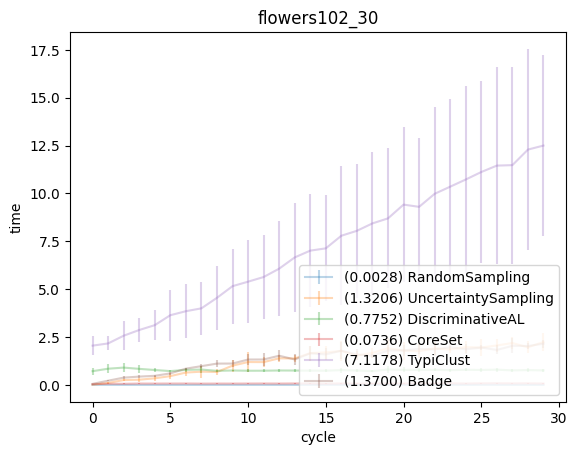

In [9]:
for qs_name in query_strategy_names:
    qs_result_t = result_time.loc[qs_name]
    qs_result_t_mean = qs_result_t['t_mean'].to_numpy()
    qs_result_t_std = qs_result_t['t_std'].to_numpy()

    plt.errorbar(np.arange(len(qs_result_t_mean)), qs_result_t_mean, qs_result_t_std,
                 label=f"({np.mean(qs_result_t_mean):.4f}) {qs_name}", alpha=0.3)

plt.title(dataset_name)
plt.legend(loc='lower right')
plt.xlabel('cycle')
plt.ylabel('time')
# output_path = f'{dataset_name}_time.png'
output_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/result/{dataset_name}_time.pdf'
plt.savefig(output_path)